In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
dfH = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv')
dfH.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [35]:
from sklearn.impute import SimpleImputer
# Identify columns with null values
columns_with_nulls = dfH.columns[dfH.isnull().any()]

# Choose a strategy for handling null values using 'mean'
imputer = SimpleImputer(strategy='mean') 

# Fit and transform the imputer on the specified columns
dfH[columns_with_nulls] = imputer.fit_transform(dfH[columns_with_nulls])


In [36]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [37]:
# dfH.describe()

In [38]:
dfH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26280 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26280 non-null  float64
 4   Total_rides              26280 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [39]:
dfH.apply(lambda x: len(x.unique()))

Casual                      836
Date                       1095
Hour                         24
Member                     1160
Total_rides                1671
relativehumidity_2m (%)      96
temperature_2m (°C)         532
weathercode (wmo code)       13
windspeed_10m (km/h)        332
dtype: int64

In [40]:
dfH.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

In [41]:
# Calculate the total number of rides
total_rides = dfH["Total_rides"].sum()
print("Total rides:", total_rides)

Total rides: 10698475.052723743


In [65]:
# Add a new column with an index as a counting number
dfH['Count'] = dfH.index

dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year,Season,Rush_Hour and Weak_hour,Count
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021,Winter,Weak Hour,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021,Winter,Weak Hour,1
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,1,2021,Winter,Weak Hour,2
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,1,2021,Winter,Weak Hour,3
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,1,2021,Winter,Weak Hour,4


In [42]:

# Calculate the number of rides by member type
member_rides = dfH.groupby("Member")["Total_rides"].sum()
print("Rides by member type:\n", member_rides)

Rides by member type:
 Member
0.0         85.0
1.0        282.0
2.0        748.0
3.0       1312.0
4.0       1763.0
           ...  
1490.0    2185.0
1495.0    2242.0
1507.0    2185.0
1528.0    2175.0
1534.0    2262.0
Name: Total_rides, Length: 1160, dtype: float64


In [43]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [44]:
dfH = dfH.rename(columns={'weathercode (wmo code)':'weather',
                       'temperature_2m (°C)':'Temp',
                       'windspeed_10m (km/h)':'Windspeed',
                       'relativehumidity_2m (%)':'Humidity'})
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [45]:
# Convert the 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])

# Extract Month and Year from the 'Date' column
dfH['Month'] = dfH['Date'].dt.month
dfH['Year'] = dfH['Date'].dt.year

dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,1,2021
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,1,2021
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,1,2021


In [46]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
      return 'Winter'
    elif month in [3, 4, 5]:
      return 'Spring'
    elif month in [6, 7, 8]:
      return 'Summer'
    else:
      return 'Fall'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfH['Season'] = dfH['Month'].apply(get_season)
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year,Season
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021,Winter
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021,Winter
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,1,2021,Winter
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,1,2021,Winter
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,1,2021,Winter


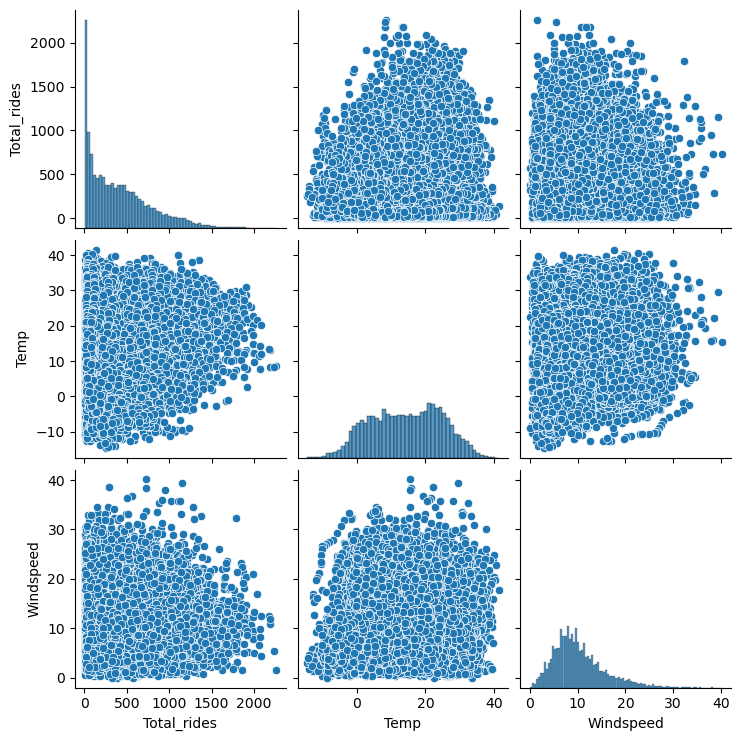

In [47]:
# Pair plot: Visualize relationships between multiple features
sns.pairplot(dfH[['Total_rides', 'Temp', 'Windspeed']])
plt.show()


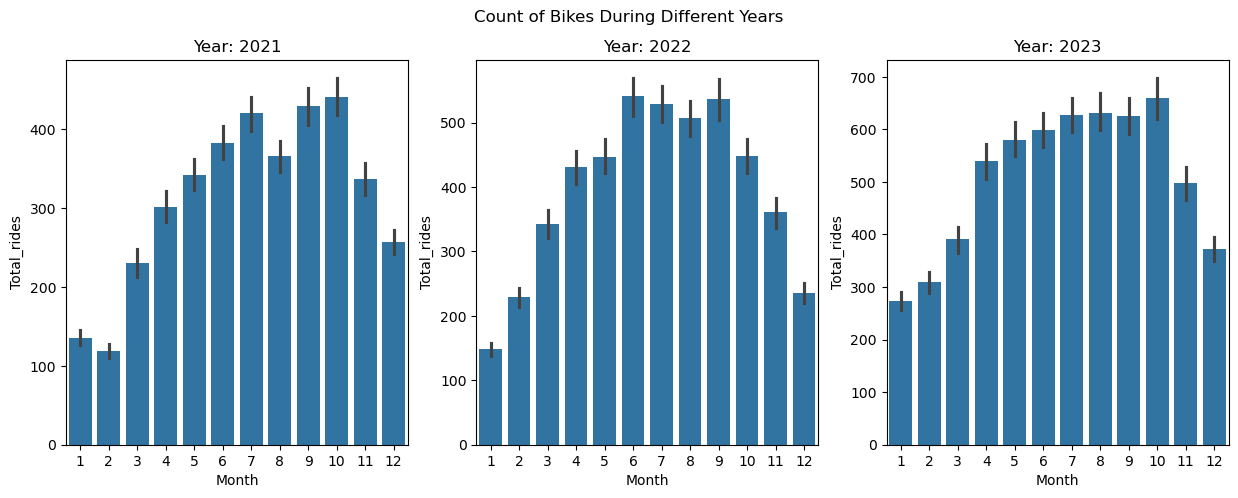

In [67]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()


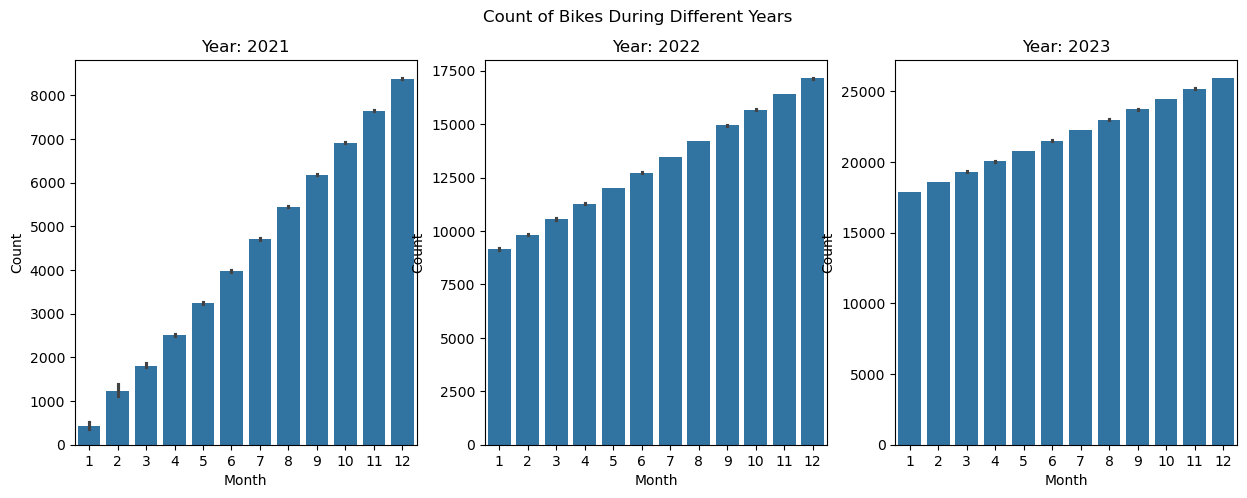

In [68]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Count', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

In [49]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Month', 'Year', 'Season'],
      dtype='object')

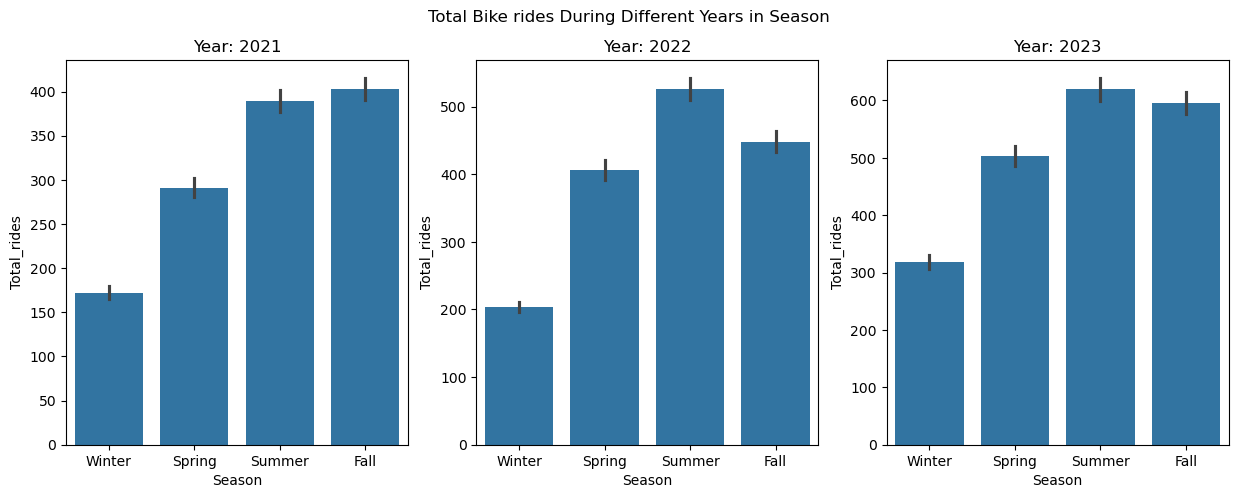

In [50]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Total Bike rides During Different Years in Season')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Season', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()


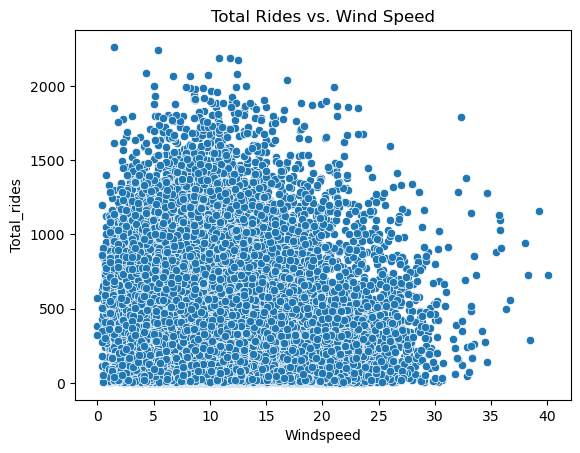

In [51]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.scatterplot(x='Windspeed', y='Total_rides', data=dfH)
plt.title('Total Rides vs. Wind Speed')
plt.show()

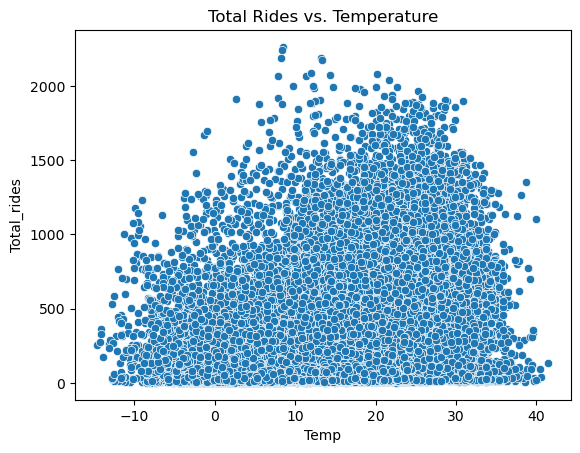

In [52]:

# Scatter plot: Total_rides vs. temperature_2m_mean
sns.scatterplot(x='Temp', y='Total_rides', data=dfH)
plt.title('Total Rides vs. Temperature')
plt.show()

[Text(0.5, 1.0, 'Bike Rides during Hours: Casual')]

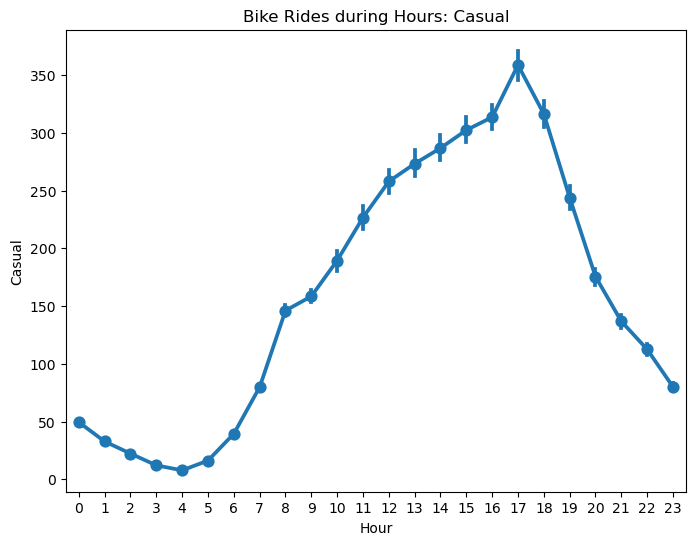

In [73]:
fig, ax = plt.subplots(figsize=(8,6))
sns.pointplot(data=dfH, x='Hour', y='Casual', ax=ax)
ax.set(title='Bike Rides during Hours: Casual')

[Text(0.5, 1.0, ' Bike Ride during Hour: Members')]

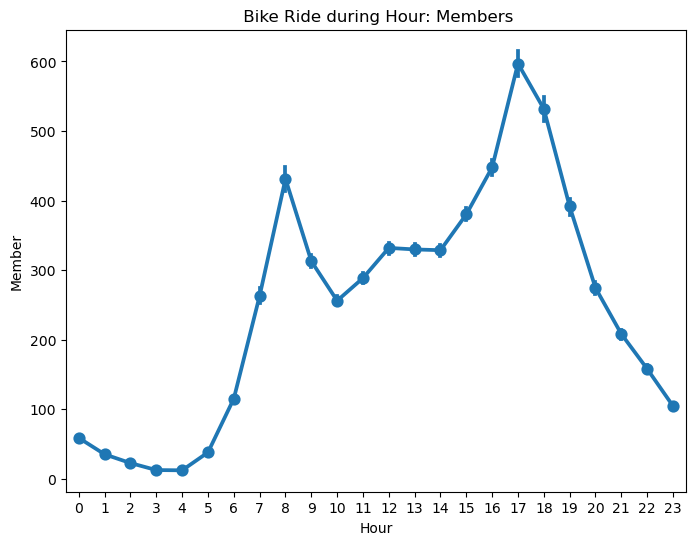

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
sns.pointplot(data=dfH, x='Hour', y='Member', ax=ax)
ax.set(title=' Bike Ride during Hour: Members')

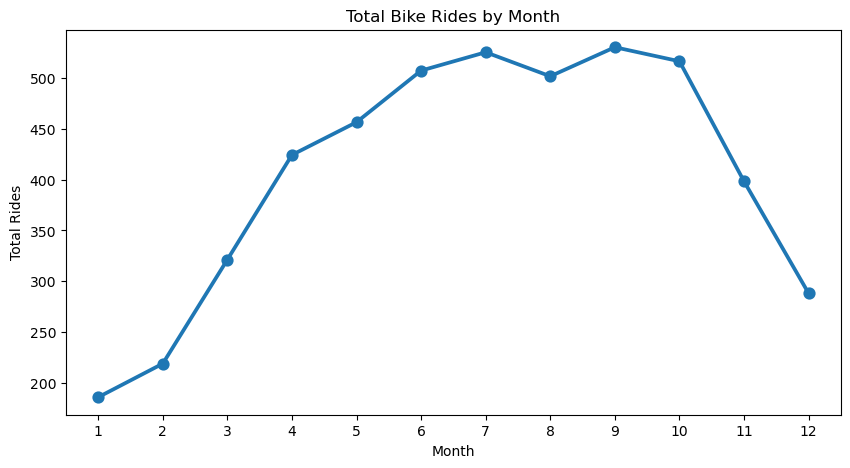

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=dfH, x='Month', y='Total_rides', errorbar=None, ax=ax)
ax.set(title='Total Bike Rides by Month')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Month')
plt.show()

[Text(0.5, 1.0, 'Total Rides of bikes during Hours: Registered users')]

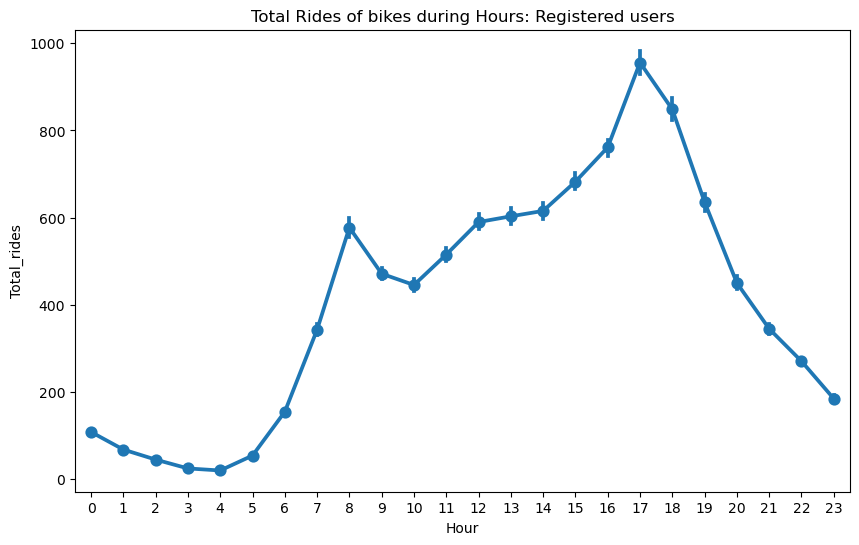

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=dfH, x='Hour', y='Total_rides', ax=ax)
ax.set(title='Total Rides of bikes during Hours: Registered users')

[Text(0.5, 1.0, 'Toatl Bike Rides during different Season')]

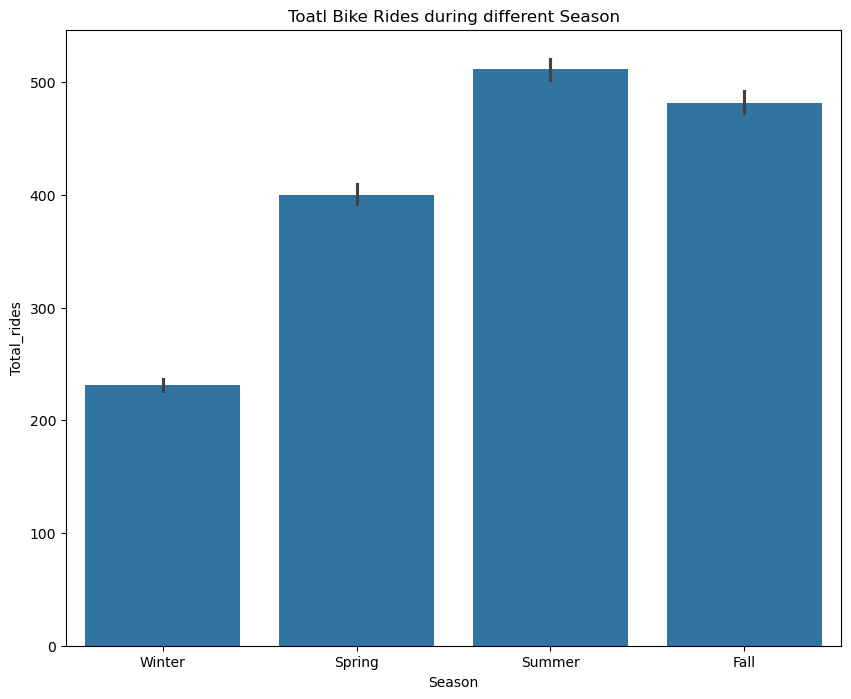

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dfH, x='Season', y='Total_rides', ax=ax)
ax.set(title='Toatl Bike Rides during different Season')

In [58]:
# Define rush hour periods (you can customize these based on your data)
rush_hours = [(6, 10), (16, 20)]  # Morning and evening rush hours
def is_rush_hour(hour):
    for start, end in rush_hours:
      if start <= hour <= end:
        return 'Rush Hour'
    return 'Weak Hour'

# Apply the is_rush_hour function to the 'Hour' column and create a new 'Rush_Hour' column
dfH['Rush_Hour and Weak_hour'] = dfH['Hour'].apply(is_rush_hour)


In [59]:
dfH.head(2)

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Month,Year,Season,Rush_Hour and Weak_hour
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,1,2021,Winter,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,2021,Winter,Weak Hour


In [60]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Month', 'Year', 'Season',
       'Rush_Hour and Weak_hour'],
      dtype='object')

[Text(0.5, 1.0, 'Total Bike Rides during Rush_Hour and Weak_hour')]

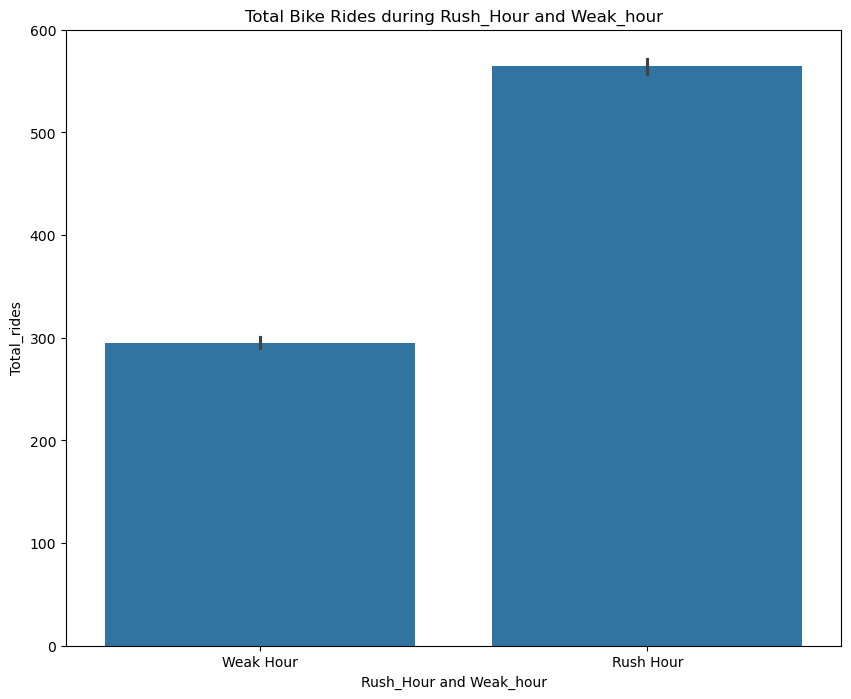

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dfH, x='Rush_Hour and Weak_hour', y='Total_rides', ax=ax)
ax.set(title='Total Bike Rides during Rush_Hour and Weak_hour')

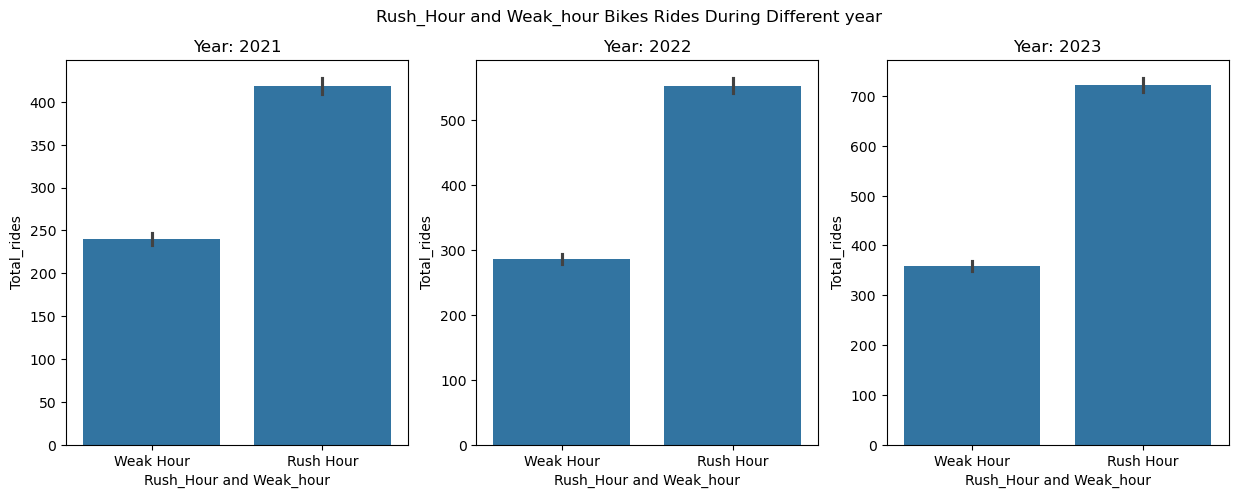

In [62]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Rush_Hour and Weak_hour Bikes Rides During Different year')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Rush_Hour and Weak_hour', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error